<a href="https://colab.research.google.com/github/Nabaranjan/Machine-Learning-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fifa_eda.csv")

In [4]:
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340.0,Right,4.0,4.0,LF,2012,2020-01-01,5.666667,163.0,172100.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,Right,4.0,4.0,RCM,2012,2020-01-01,5.666667,146.0,137400.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000.0,455.0,Right,5.0,3.0,RS,2014,2021-01-01,6.000000,190.0,164000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,Right,4.0,3.0,RCB,2005,2020-01-01,6.000000,181.0,104600.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000.0,94.0,Right,3.0,1.0,GK,2014,2021-01-01,6.166667,192.0,144500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [7]:
df.nunique()

,0
ID,18207
Name,17194
Age,29
Nationality,164
Overall,48
Potential,47
Club,651
Value,216
Wage,144
Preferred Foot,2


In [9]:
df.shape

(18207, 18)

In [10]:
df.dtypes

,0
ID,int64
Name,object
Age,int64
Nationality,object
Overall,int64
Potential,int64
Club,object
Value,float64
Wage,float64
Preferred Foot,object


In [11]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,241
Value,252
Wage,0
Preferred Foot,0


In [12]:
df.duplicated().sum()

np.int64(0)

<BarContainer object of 29 artists>

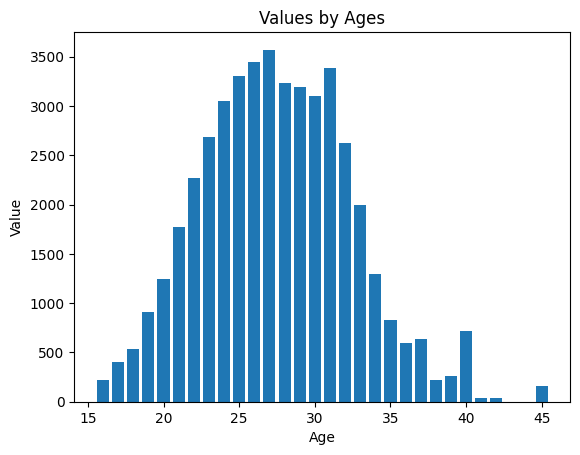

In [14]:
ages = sorted(df["Age"].unique())
values = [df[df["Age"] == age]["Value"].mean() for age in ages]
plt.title("Values by Ages")
plt.xlabel("Age")
plt.ylabel("Value")
plt.bar(ages, values)

In [15]:
valid_clubs_df = df[df["Club"].notna()]
clubs = valid_clubs_df["Club"].unique()
print("Length of the valid clubs:", len(clubs), "\nTotal nan value of the clubs:", pd.isna(clubs).sum())

Length of the valid clubs: 651 
Total nan value of the clubs: 0


In [16]:
heights = np.array([df[df["Club"] == club]["Height"].mean() for club in clubs])
print("Length of the valid heights:", len(heights), "\nTotal nan value of the heights:", np.isnan(heights).sum())

Length of the valid heights: 651 
Total nan value of the heights: 0


In [17]:
sorted_indices = np.argsort(heights)
heights = heights[sorted_indices]
clubs = clubs[sorted_indices]

top_heights = heights[-5:]
tallest_clubs = clubs[-5:]
print("Top 5 clubs according to player's height:", tallest_clubs, "\nTheir heights:", top_heights)

Top 5 clubs according to player's height: ['FC Midtjylland' ' SSV Jahn Regensburg' 'Holstein Kiel' 'SPAL'
 'AC Horsens'] 
Their heights: [6.07407407 6.08045977 6.08333333 6.08641975 6.12      ]


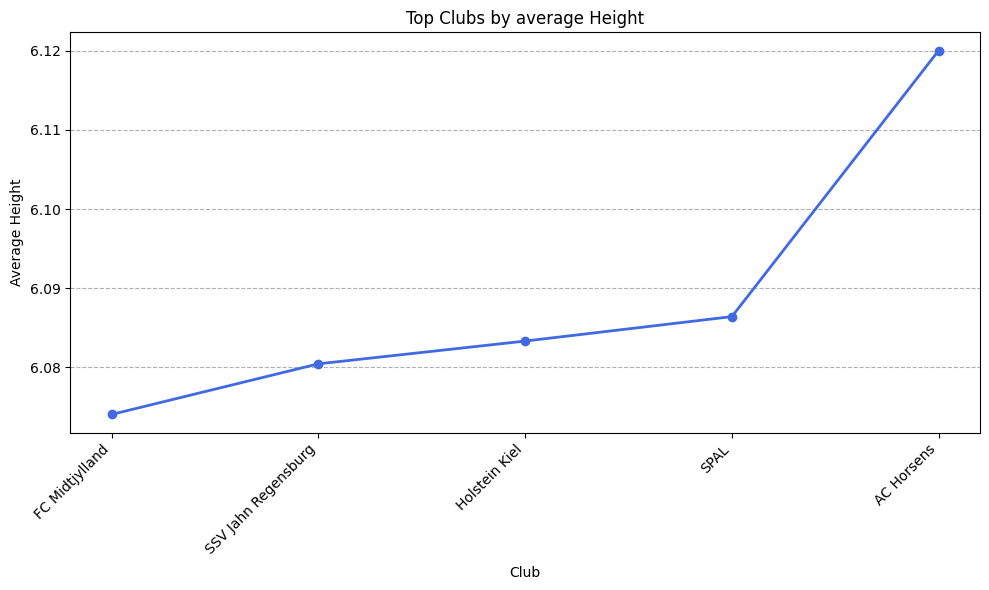

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tallest_clubs, top_heights, marker="o", linestyle="-", linewidth=2, color="royalblue")

plt.title("Top Clubs by average Height")
plt.xlabel("Club")
plt.ylabel("Average Height")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--")

plt.tight_layout()
plt.show()